# Airlines clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading the data set
airline_1=pd.read_csv("EastWestAirlines.csv")

In [3]:
## chaking the dataset
airline_1.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
## from above the ID column is not important so we drop it
airline_2=airline_1.drop(['ID#'],axis=1)

In [5]:
airline_2.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
## chaking the shape of the data
airline_2.shape

(3999, 11)

In [7]:
airline_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


# EDA

In [8]:
## chaking for the null values
airline_2.isnull().count()

Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64

In [9]:
airline_2.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
## chaking for the Qual_miles
(airline_2['Qual_miles']).value_counts()

0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: Qual_miles, Length: 164, dtype: int64

In [11]:
## From above observation the 0 covering maximum part of the data so we can drop it as our machune not learning anything
airline_3=airline_2.drop(['Qual_miles'],axis=1)

In [12]:
airline_3.head(5)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,1


In [13]:
## chaking for the cc1_miles
(airline_3['cc1_miles']).value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [14]:
## chaking for the cc2_miles
(airline_3['cc2_miles']).value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

In [15]:
## chaking for the cc3_miles
(airline_3['cc3_miles']).value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

In [16]:
## droping cc3_miles as it biased towards the 1
airline_4=airline_3.drop(['cc3_miles'],axis=1)

In [17]:
airline_4.head()

,Balance,cc1_miles,cc2_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,174,1,0,0,7000,0
1,19244,1,1,215,2,0,0,6968,0
2,41354,1,1,4123,4,0,0,7034,0
3,14776,1,1,500,1,0,0,6952,0
4,97752,4,1,43300,26,2077,4,6935,1


In [18]:
## chaking for the Bonus_miles
(airline_4['Bonus_miles']).value_counts()

0        475
500       66
1000      42
100       27
1500      25
        ... 
11981      1
28904      1
9850       1
52449      1
25447      1
Name: Bonus_miles, Length: 2734, dtype: int64

In [19]:
## to get the good result we replave the 0 values with mean
(airline_4['Bonus_miles'].mean())

17144.84621155289

In [20]:
 airline_4['Bonus_miles'] = airline_4['Bonus_miles'].replace(0, 17144)

In [21]:
## chaking for the Bonus_miles
(airline_4['Bonus_miles']).value_counts()

17144    475
500       66
1000      42
100       27
1500      25
        ... 
11981      1
28904      1
9850       1
52449      1
25447      1
Name: Bonus_miles, Length: 2734, dtype: int64

In [22]:
airline_4.head(5)

,Balance,cc1_miles,cc2_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,174,1,0,0,7000,0
1,19244,1,1,215,2,0,0,6968,0
2,41354,1,1,4123,4,0,0,7034,0
3,14776,1,1,500,1,0,0,6952,0
4,97752,4,1,43300,26,2077,4,6935,1


In [23]:
## chaking for the Bonus_trans
(airline_4['Bonus_trans']).value_counts()

0     475
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125
6     115
11    108
2     104
8     100
10     97
19     97
9      91
7      88
20     85
21     69
22     63
24     41
26     41
23     35
25     34
27     32
28     28
32     26
29     23
31     21
30     17
34     15
39     12
35     11
37     11
38     10
33      8
41      7
43      7
36      6
45      5
40      4
53      4
51      4
44      3
50      3
47      3
46      2
65      2
49      2
55      1
52      1
58      1
86      1
68      1
Name: Bonus_trans, dtype: int64

In [24]:
(airline_4['Bonus_trans'].mean()) 

11.60190047511878

In [25]:
airline_4['Bonus_trans'] = airline_4['Bonus_trans'].replace(0, 12)

In [26]:
## chaking for the Flight_miles_12mo
(airline_4['Flight_miles_12mo']).value_counts()

0        2723
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: Flight_miles_12mo, Length: 343, dtype: int64

In [27]:
(airline_4['Flight_miles_12mo'].mean()) 

460.05576394098523

In [28]:
airline_4['Flight_miles_12mo'] = airline_4['Flight_miles_12mo'].replace(0, 460)

In [29]:
## chaking for the Flight_trans_12
(airline_4['Flight_trans_12']).value_counts()

0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: Flight_trans_12, dtype: int64

In [30]:
(airline_4['Flight_trans_12'].mean()) 

1.3735933983495874

In [31]:
 airline_4['Flight_trans_12'] = airline_4['Flight_trans_12'].replace(0, 1)

In [32]:
## chaking for the Flight_trans_12
(airline_4['Award?']).value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

In [33]:
airline_5=airline_4.drop(['Award?'],axis=1)

In [34]:
airline_5.head(5)

,Balance,cc1_miles,cc2_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,1,1,174,1,460,1,7000
1,19244,1,1,215,2,460,1,6968
2,41354,1,1,4123,4,460,1,7034
3,14776,1,1,500,1,460,1,6952
4,97752,4,1,43300,26,2077,4,6935


In [35]:
## Transformation of the data
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(airline_5)
X = stscaler.transform(airline_5)

In [52]:
X

array([[-4.51140783e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -2.39021168e-01, -2.95540719e-01,  1.39545434e+00],
       [-5.39456874e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -2.39021168e-01, -2.95540719e-01,  1.37995704e+00],
       [-3.20031232e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -2.39021168e-01, -2.95540719e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05,  6.83121167e-01, -9.82418871e-02, ...,
        -2.39021168e-01, -2.95540719e-01, -1.31560393e+00],
       [-1.85606976e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -2.08502542e-01, -2.95540719e-01, -1.31608822e+00],
       [-7.00507951e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -2.39021168e-01, -2.95540719e-01, -1.31754109e+00]])

# Building the clustering models

# 1) Hierarchical clustering

In [53]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [54]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [55]:
# save clusters for chart
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [56]:
Clusters.value_counts()

Clusters
1           2278
0           1591
2             87
3             43
dtype: int64

## as the data size is more so Hierarchical clustrering is not good for detecting clusters

# 2) K-mean clustering

In [57]:
# Importing the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [58]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

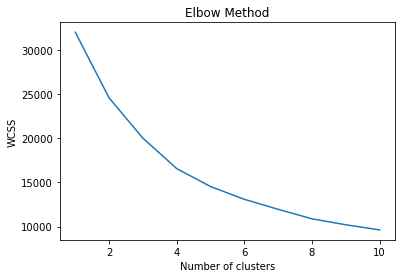

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## From above we can consider cluster as 4 as elbow shows 4

In [61]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(X)
# Check the result
identified_clusters

array([0, 0, 0, ..., 8, 3, 3])

In [51]:
identified_clusters

array([0, 0, 0, ..., 8, 3, 3])

In [64]:
# Create a copy of the data
data_with_clusters = (airline_5).copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Balance,cc1_miles,cc2_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,1,1,174,1,460,1,7000,0
1,19244,1,1,215,2,460,1,6968,0
2,41354,1,1,4123,4,460,1,7034,0
3,14776,1,1,500,1,460,1,6952,0
4,97752,4,1,43300,26,2077,4,6935,5
...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,8525,4,200,1,1403,3
3995,64385,1,1,981,5,460,1,1395,3
3996,73597,3,1,25447,8,460,1,1402,8
3997,54899,1,1,500,1,500,1,1401,3


# 3) DBSCAN MODEL

In [65]:
from sklearn.cluster import DBSCAN

In [87]:
dbscan = DBSCAN(eps=0.8, min_samples=19)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=19)

In [88]:
#Noisy samples are given the label -1.
labels=dbscan.labels_

In [89]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [91]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,0
3997,0


In [92]:
cl.value_counts()

cluster
 0         3232
-1          767
dtype: int64

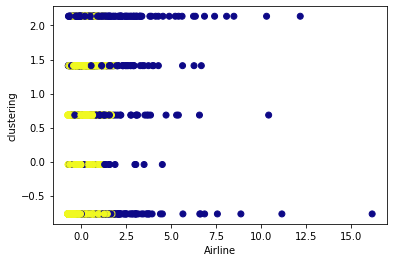

In [93]:
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Airline") # X-axis label
plt.ylabel("clustering") # Y-axis label
plt.show() # showing the plot

# From above all blues are clusters and the yellow ones are the outliers